<a href="https://colab.research.google.com/github/VesalAhsani/Deep-learning-and-AI-with-PyTorch/blob/main/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST is a popular dataset for machine learning and computer vision, and it can be loaded using the `torchvision` library in PyTorch. Torchvision is a PyTorch library for computer vision tasks that provides pre-trained models, datasets, and image transformations.

we first import the datasets module from torchvision. We then use the MNIST class to load the training and testing datasets. The root argument specifies the directory where the data will be stored, and the train argument specifies whether to load the training or testing dataset. The download argument specifies whether to download the data if it is not already present.

Once the data is loaded, it can be processed using the PyTorch framework. We then convert the data into tensors, and normalize the pixel values to the range `[0, 1]`. The tensors can then be used to train and evaluate a neural network.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.MNIST(
    root=".",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
test_dataset = torchvision.datasets.MNIST(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")
device

device(type='cuda', index=0)

* The CrossEntropyLoss loss function in PyTorch combines both the log-softmax activation and the negative log-likelihood loss, making it unnecessary to apply the softmax activation function to the output layer of the neural network.

* The softmax activation function is used to transform the outputs of a neural network into probabilities that sum to 1, so that they can be interpreted as the model's predicted class probabilities. However, the CrossEntropyLoss function already performs this step internally, making it redundant to apply the softmax activation function at the end of the layers.

* Additionally, applying the softmax activation function after the CrossEntropyLoss function can actually lead to numerical instability, as it may result in extremely high or low values that can cause problems during optimization.

* In summary, it is not necessary to use the softmax activation function at the end of the layers when using the CrossEntropyLoss loss function because the CrossEntropyLoss function already performs the necessary computations to convert the outputs of the network into class probabilities, and applying the softmax function may result in numerical instability.

In [5]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [7]:
batch_size=128
train_loader = torch.utils.data.DataLoader(dataset= train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [8]:
n_epochs=10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    
    inputs = inputs.view(-1, 784)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f"Epochs: {it+1}/{n_epochs}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")

Epochs: 1/10, train_loss: 0.2909, test_loss: 0.1416
Epochs: 2/10, train_loss: 0.1233, test_loss: 0.1065
Epochs: 3/10, train_loss: 0.0845, test_loss: 0.0891
Epochs: 4/10, train_loss: 0.0647, test_loss: 0.0828
Epochs: 5/10, train_loss: 0.0506, test_loss: 0.0830
Epochs: 6/10, train_loss: 0.0412, test_loss: 0.0861
Epochs: 7/10, train_loss: 0.0319, test_loss: 0.0935
Epochs: 8/10, train_loss: 0.0275, test_loss: 0.0829
Epochs: 9/10, train_loss: 0.0219, test_loss: 0.0941
Epochs: 10/10, train_loss: 0.0205, test_loss: 0.0852


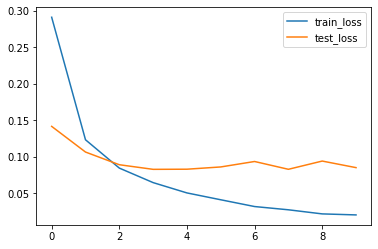

In [9]:
plt.plot(train_losses, label = "train_loss")
plt.plot(test_losses, label = "test_loss")
plt.legend();

In [10]:
n_correct = 0
n_total = 0

for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    
    inputs = inputs.view(-1, 784)

    outputs = model(inputs)
    _ , predictions = torch.max(outputs, 1)

    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0
n_total = 0

for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    
    inputs = inputs.view(-1, 784)

    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)

    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"train_accuracy: {train_acc:.4f}, test_accuracy: {test_acc:.4f}")

train_accuracy: 0.9959, test_accuracy: 0.9766


A confusion matrix is a useful tool for evaluating the performance of a classification model, such as a neural network trained on the MNIST dataset. It provides a visual representation of the model's ability to correctly predict the class of each example in the test dataset.

The confusion matrix displays the number of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions made by the model. True positive predictions are the number of examples where the model correctly predicted the positive class (in the case of MNIST, correctly identifying a specific digit). False positive predictions are the number of examples where the model predicted the positive class but was incorrect. True negatives are the number of examples where the model correctly predicted the negative class (i.e., not a specific digit), while false negatives are the number of examples where the model predicted the negative class but was incorrect.

In summary, plotting a confusion matrix for the predicted labels y_pred and true labels y_test after training a neural network on the MNIST dataset is useful because it provides a visual representation of the model's performance, allowing you to quickly identify its strengths and weaknesses and make any necessary improvements.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

Confusion matrix, without normalization
[[ 972    0    2    1    0    1    2    0    1    1]
 [   0 1121    4    1    0    1    2    2    4    0]
 [   5    0 1013    1    2    0    2    4    4    1]
 [   0    0    8  974    1   15    0    3    3    6]
 [   0    0    2    1  967    1    4    0    1    6]
 [   4    0    1    3    0  874    5    1    3    1]
 [   3    3    1    1    7    5  938    0    0    0]
 [   2    2   10    3    3    0    0 1002    2    4]
 [   6    0    3    3    3   11    3    4  938    3]
 [   3    3    0    5   17    7    0    5    2  967]]


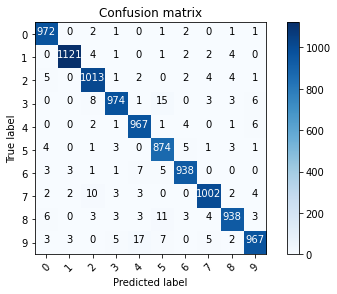

In [13]:
for inputs, targets in test_loader:
  inputs = inputs.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)

  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

plot_confusion_matrix (y_test, p_test, list(range(10)))

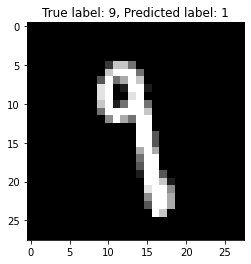

In [24]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title(f"True label: {y_test[i]}, Predicted label: {int(p_test[i])}");